## Diamonds_Exploring and Plotting with pandas and seaborn

Import the necessary modules:

In [1]:
import seaborn as sns
import pandas as pd 

Import the diamonds dataset from seaborn: 

In [2]:
diamonds_df = sns.load_dataset('diamonds') 

Plot a histogram using the diamonds dataset where x axis = carat: 

array([[<AxesSubplot:title={'center':'carat'}>]], dtype=object)

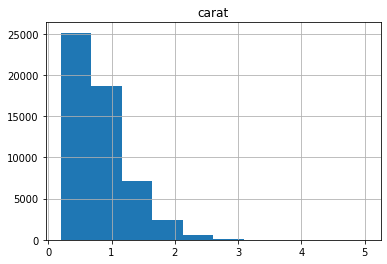

In [3]:
diamonds_df.hist(column='carat')

The y axis in this plot denotes the number of diamonds in the dataset with the carat
specification on the x-axis

The hist function has a parameter called bins, which literally refers to the number of
equally sized bins into which the data points are divided. By default, the bins parameter
is set to 10 in pandas. We can change this to a different number, if we wish. 

Change the bins parameter to 50: 

array([[<AxesSubplot:title={'center':'carat'}>]], dtype=object)

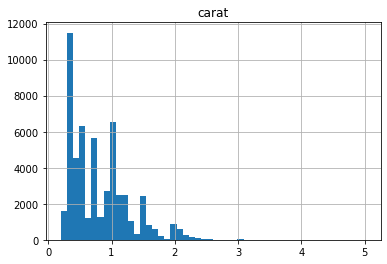

In [4]:
diamonds_df.hist(column='carat', bins=50) 

lets look at a histogram using seaborn: 

E:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='carat', ylabel='Density'>

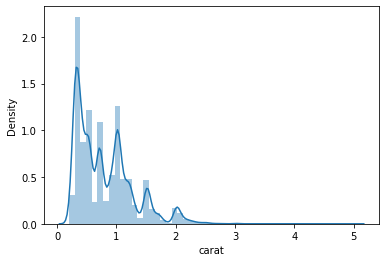

In [8]:
sns.distplot(diamonds_df.carat)

 1. pandas sets the bins parameter to a default of 10, but seaborn infers an
appropriate bin size based on the statistical distribution of the dataset.
 2. By default, the distplot function also includes a smoothed curve over the
histogram, called a kernel density estimation.

Change kde=False to remove the KDE: 

E:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='carat'>

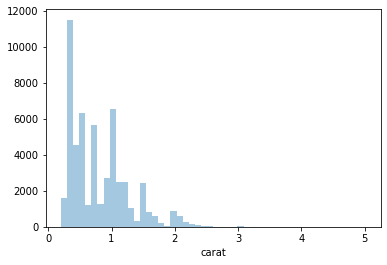

In [9]:
sns.distplot(diamonds_df.carat, kde=False) 

Also note that the bins parameter seemed to render a more detailed plot when the bin
size was increased from 10 to 50. Now, let's try to increase it to 100. 


<AxesSubplot:xlabel='carat'>

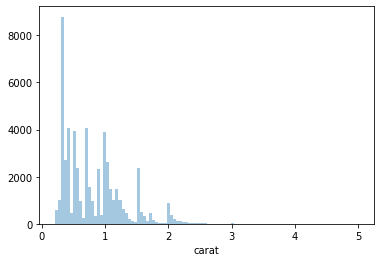

In [10]:
sns.distplot(diamonds_df.carat, kde=False, bins=100) 

A log transformation helps in identifying more trends. For instance, in the following
graph, the x-axis shows log-transformed values of the price variable, and we see that 
there are two peaks indicating two kinds of diamonds—one with a high price and
another with a low price. 

<AxesSubplot:xlabel='price'>

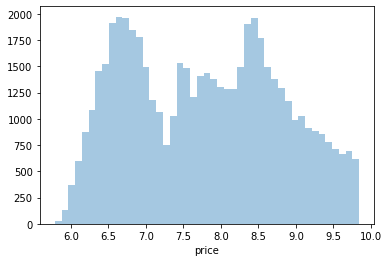

In [11]:
import numpy as np
sns.distplot(np.log(diamonds_df.price), kde=False) 

 Looking at the histogram, we immediately gets a picture
of the distribution of the feature. Specifically, three observations are important in a
histogram:
 1. Which feature values are more frequent in the dataset (in this case, there is a peak at
around 6.8 and another peak between 8.5 and 9—note that log(price) = values, in this
case,
 2. How many peaks exist in the data (the peaks need to be further inspected for possible
causes in the context of the data)
 3. Whether there are any outliers in the data 


### Creating a Bar Plot and Calculating the Mean Price Distribution 

Here we'll learn how to create a table using the pandas crosstab function. We'll use a table to
generate a bar plot. We'll then explore a bar plot generated using the seaborn library and
calculate the mean price distribution

Print the unique values of the cut column: 

In [12]:
diamonds_df.cut.unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']

Print the unique values of the clarity column: 


In [13]:
diamonds_df.clarity.unique()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']

unique() returns an array. There are five unique cut qualities and eight unique values
in clarity. The number of unique values can be obtained using nunique() in pandas. 

To obtain the counts of diamonds of each cut quality, we first create a table using the
pandas crosstab() function: 

In [14]:
cut_count_table = pd.crosstab(index=diamonds_df['cut'],columns='count')
cut_count_table

col_0,count
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


Pass these counts to another pandas function, plot(kind='bar'): 


<AxesSubplot:xlabel='cut'>

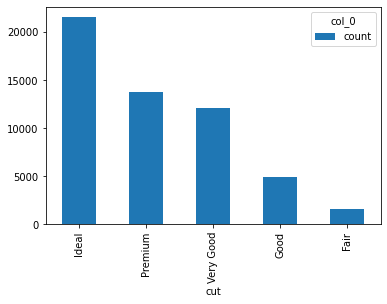

In [16]:
cut_count_table.plot(kind='bar') 

We see that most of the diamonds in the dataset are of the Ideal cut quality, followed
by Premium, Very Good, Good, and Fair. Now, let's see how to generate the same
plot using seaborn. 

E:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


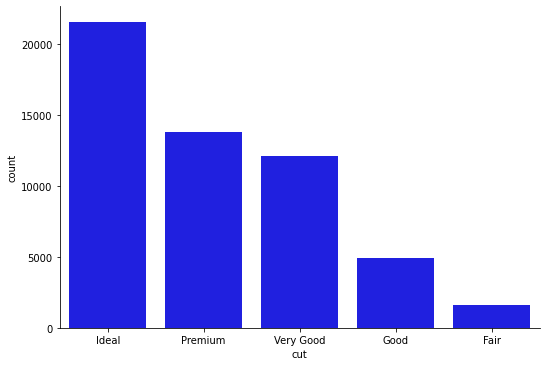

In [17]:
sns.catplot("cut", data=diamonds_df, aspect=1.5, kind="count", color="b") 


Here is how we obtain the mean price distribution of different cut qualities using
seaborn: 

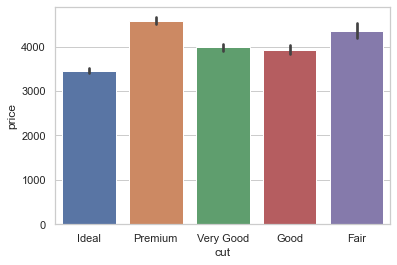

In [19]:
from numpy import median, mean
sns.set(style="whitegrid")
ax = sns.barplot(x="cut", y="price", data=diamonds_df,estimator=mean)

Here, the black lines (error bars) on the rectangles indicate the uncertainty (or spread
of values) around the mean estimate. By default, this value is set to 95% confidence.
How do we change it? We use the ci=68 parameter, for instance, to set it to 68%. We
can also plot the standard deviation in the prices using ci=sd. 

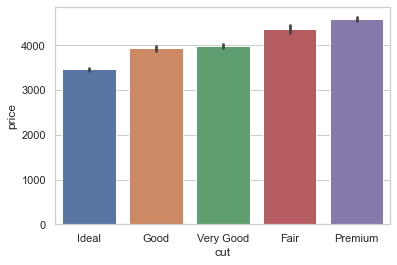

In [20]:
ax = sns.barplot(x="cut", y="price", data=diamonds_df, estimator=mean, ci=68,
order=['Ideal','Good','Very Good','Fair','Premium']) 

Grouped bar plots can be very useful for visualizing the variation of a particular feature within
different groups.

## Creating Bar Plots Grouped by a Specific Feature 

We will use the diamonds dataset to generate the distribution of prices with respect to color
for each cut quality. In Creating a Bar Plot and Calculating the Mean Price Distribution, we
looked at the price distribution for diamonds of different cut qualities. Now, we would like to
look at the variation in each color: 


Use the hue parameter to plot nested groups: 

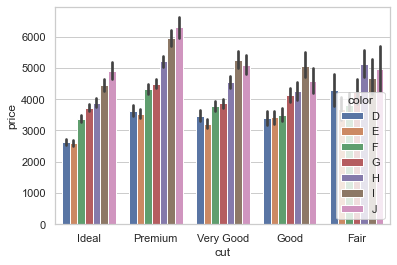

In [21]:
ax = sns.barplot(x="cut", y="price", hue='color', data=diamonds_df) 

Here, we can observe that the price patterns for diamonds of different colours are similar for
each cut quality. For instance, for Ideal diamonds, the price distribution of diamonds of
different colours is the same as that for Premium, and other diamonds. 

## Tweaking Plot Parameters 

Looking at the last figure in our previous section, we find that the legend is not appropriately
placed. We can tweak the plot parameters to adjust the placements of the legends and the axis
labels, as well as change the font-size and rotation of the tick labels. 


### Tweaking the Plot Parameters of a Grouped Bar Plot 

Now, we'll tweak the plot parameters, for example, hue, of a grouped bar plot. We'll see how
to place legends and axis labels in the right places and also explore the rotation feature: 

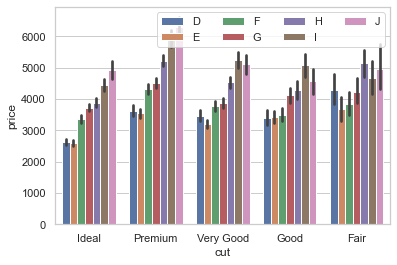

In [22]:
ax = sns.barplot(x='cut', y='price', hue='color', data=diamonds_df)
ax.legend(loc='upper right',ncol=4) 

In the preceding ax.legend() call, the ncol parameter denotes the number of columns
into which values in the legend are to be organized, and the loc parameter specifies the
location of the legend and can take any one of eight values (upper left, lower center,
and so on). 

To modify the axis labels on the x axis and y axis, input the following code:

Text(0, 0.5, 'Price')

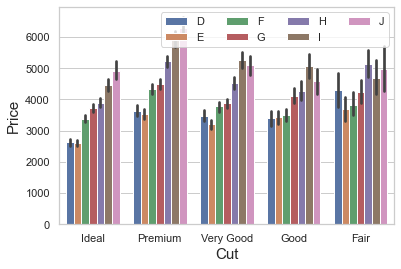

In [23]:
ax = sns.barplot(x='cut', y='price', hue='color', data=diamonds_df)
ax.legend(loc='upper right', ncol=4)
ax.set_xlabel('Cut', fontdict={'fontsize' : 15})
ax.set_ylabel('Price', fontdict={'fontsize' : 15}) 

Similarly, use this to modify the font-size and rotation of the x axis of the tick labels: 


[Text(0, 0, 'Ideal'),
 Text(1, 0, 'Premium'),
 Text(2, 0, 'Very Good'),
 Text(3, 0, 'Good'),
 Text(4, 0, 'Fair')]

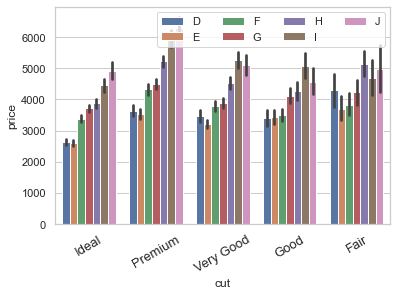

In [24]:
ax = sns.barplot(x='cut', y='price', hue='color', data=diamonds_df)
ax.legend(loc='upper right',ncol=4)
# set fontsize and rotation of x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=13, rotation=30) 

The rotation feature is particularly useful when the tick labels are long and crowd up together
on the x axis. 


### Annotations 

Another useful feature to have in plots is the annotation feature. In the following exercise, we'll
make a simple bar plot more informative by adding some annotations.Suppose we want to add
more information to the plot about ideally cut diamonds. 

Generate a bar plot using catplot function of the seaborn library: 

E:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


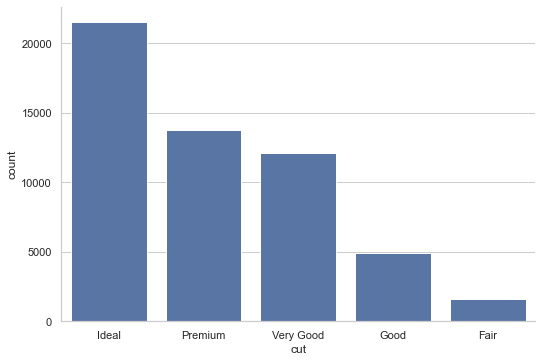

In [26]:
ax = sns.catplot("cut", data=diamonds_df, aspect=1.5, kind="count", color="b") 


Annotate the column belonging to the Ideal category:

In [27]:
# get records in the DataFrame corresponding to ideal cut
ideal_group = diamonds_df.loc[diamonds_df['cut']=='Ideal'] 

Find the location of the x coordinate where the annotation has to be placed: 

In [28]:
# get the location of x coordinate where the annotation has to be placed
x = ideal_group.index.tolist()[0]

 Find the location of the y coordinate where the annotation has to be placed: 

In [29]:
# get the location of y coordinate where the annotation has to be placed
y = len(ideal_group) 

Print the location of the x and y co-ordinates: 


In [30]:
print(x)
print(y) 


0
21551


Annotate the plot with a note: (we also need matplotlib.pyplot to do this) 

E:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.3, 23551, 'excellent polish and symmetry ratings;\nreflects almost all the light that enters it')

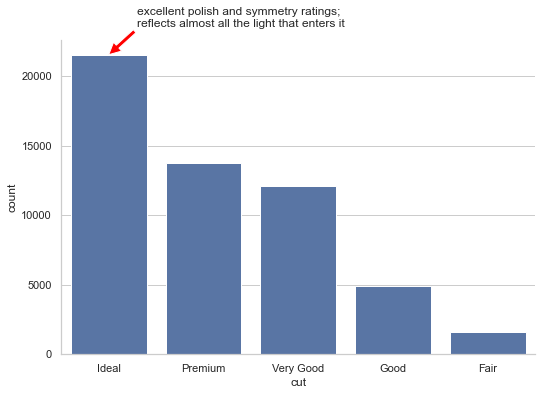

In [32]:
import matplotlib.pyplot as plt 

sns.catplot("cut", data=diamonds_df, aspect=1.5, kind="count", color="b")

plt.annotate('excellent polish and symmetry ratings;\nreflects almost all the light that enters it',
             xy=(x,y), xytext=(x+0.3, y+2000), arrowprops=dict(facecolor='red')) 
